<a href="https://colab.research.google.com/github/zenosance/Kelompok-3_PCVK_TI3H_2023/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum Minggu 7**

## **Kelompok 3 - TI 3H**
1. Mohammad Izamul Fikri Fahmi - 2141720171
2. Lukas Valentino - 2141720032
3. Septi Lutfiani - 2141720038

Load Gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Import Library yang mungkin diperlukan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Fungsi Konvolusi manual

In [3]:
def convolution2d(image: np.ndarray, kernel: np.ndarray, padding: int):
    # Get image and kernel dimensions
    image_height, image_width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]

    # Calculate output dimensions
    output_height = image_height - kernel_height + 2 * padding + 1
    output_width = image_width - kernel_width + 2 * padding + 1

    # Initialize padded array
    padded_image = np.zeros((image_height + 2 * padding, image_width + 2 * padding))
    padded_image[padding:-padding, padding:-padding] = image

    # Initialize output array
    output = np.zeros((output_height, output_width))

    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            output[i][j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    # Display the resulting image
    return output

Load Citra yang akan diolah

In [4]:
img = cv.imread ('/content/drive/MyDrive/pcvk-sem5/img/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

Kernel Sharpening

In [5]:
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

Hasil Sharpening

In [6]:
output = convolution2d(img_gray,kernel_sharpen,2)

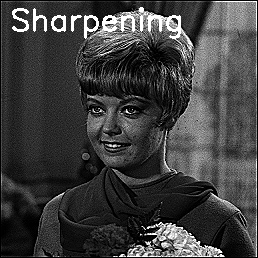

In [7]:
# Add labels to the image
cv.putText(output, 'Sharpening', (10,30), cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

# Display the image
cv2_imshow(output)

Emboss

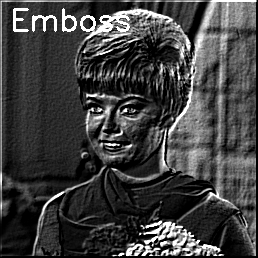

In [8]:
kernel = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
output = convolution2d(img_gray,kernel,2)

cv.putText(output, 'Emboss', (10,30), cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
cv2_imshow(output)


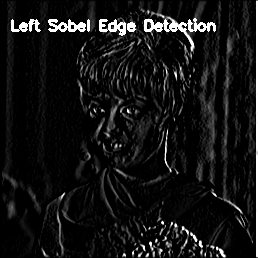

In [9]:
kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
output = convolution2d(img_gray,kernel,2)

cv.putText(output, 'Left Sobel Edge Detection', (10,30), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
cv2_imshow(output)

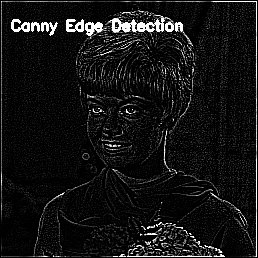

In [10]:
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
output = convolution2d(img_gray,kernel,2)

cv.putText(output, 'Canny Edge Detection', (10,30), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
cv2_imshow(output)

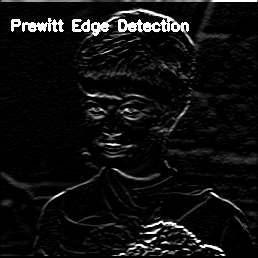

In [11]:
kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
output = convolution2d(img_gray,kernel,2)

cv.putText(output, 'Prewitt Edge Detection', (10,30), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
cv2_imshow(output)

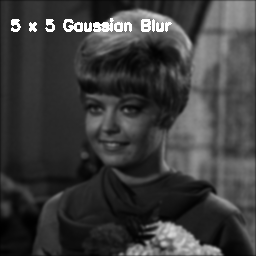

In [12]:
kernel = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) / 256
output = convolution2d(img_gray,kernel,2)

cv.putText(output, '5 x 5 Gaussian Blur', (10,30), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
cv2_imshow(output)

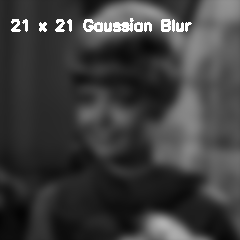

In [13]:
sigma=math.sqrt(21)
gaussian_kernel = cv.getGaussianKernel(21, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

output = convolution2d(img_gray,gauss_kernel,2)

cv.putText(output, '21 x 21 Gaussian Blur', (10,30), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
cv2_imshow(output)
